<a href="https://colab.research.google.com/github/rajputvivek07/Data-Analysis/blob/main/Titanic_Vivek_46_DA_LAb5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OEIT6, Data Analytics 2022

Name : Vivek Rajput

UID No. : 2019110046

Class : BE ETRX

Lab 5: Titanic Competition

---
**Theory: **
>> The Titanic or, in full, RMS Titanic was part of the one of the most iconic tragedies of all time. RMS Titanic was a British passenger ship that hit an iceberg while on its voyage from Southampton to New York City, and sank in the North Atlantic ocean, leaving hundreds of passengers to die in the aftermath of the deadly incident. Some of the passengers who survived till help arrived were rescued while many lost their lives helplessly waiting for help to arrive.

>> First, we have the prediction variable, that is if they survived the sinking or not. Then a bunch of numeric variables, like ids, ages of the passengers, etc. followed by categorical variables like class of the ticket, and strings like name, etc.

**Code and Ouput**

**Data Set**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
# train data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#test data
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S




---


**Missing** **Values**

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

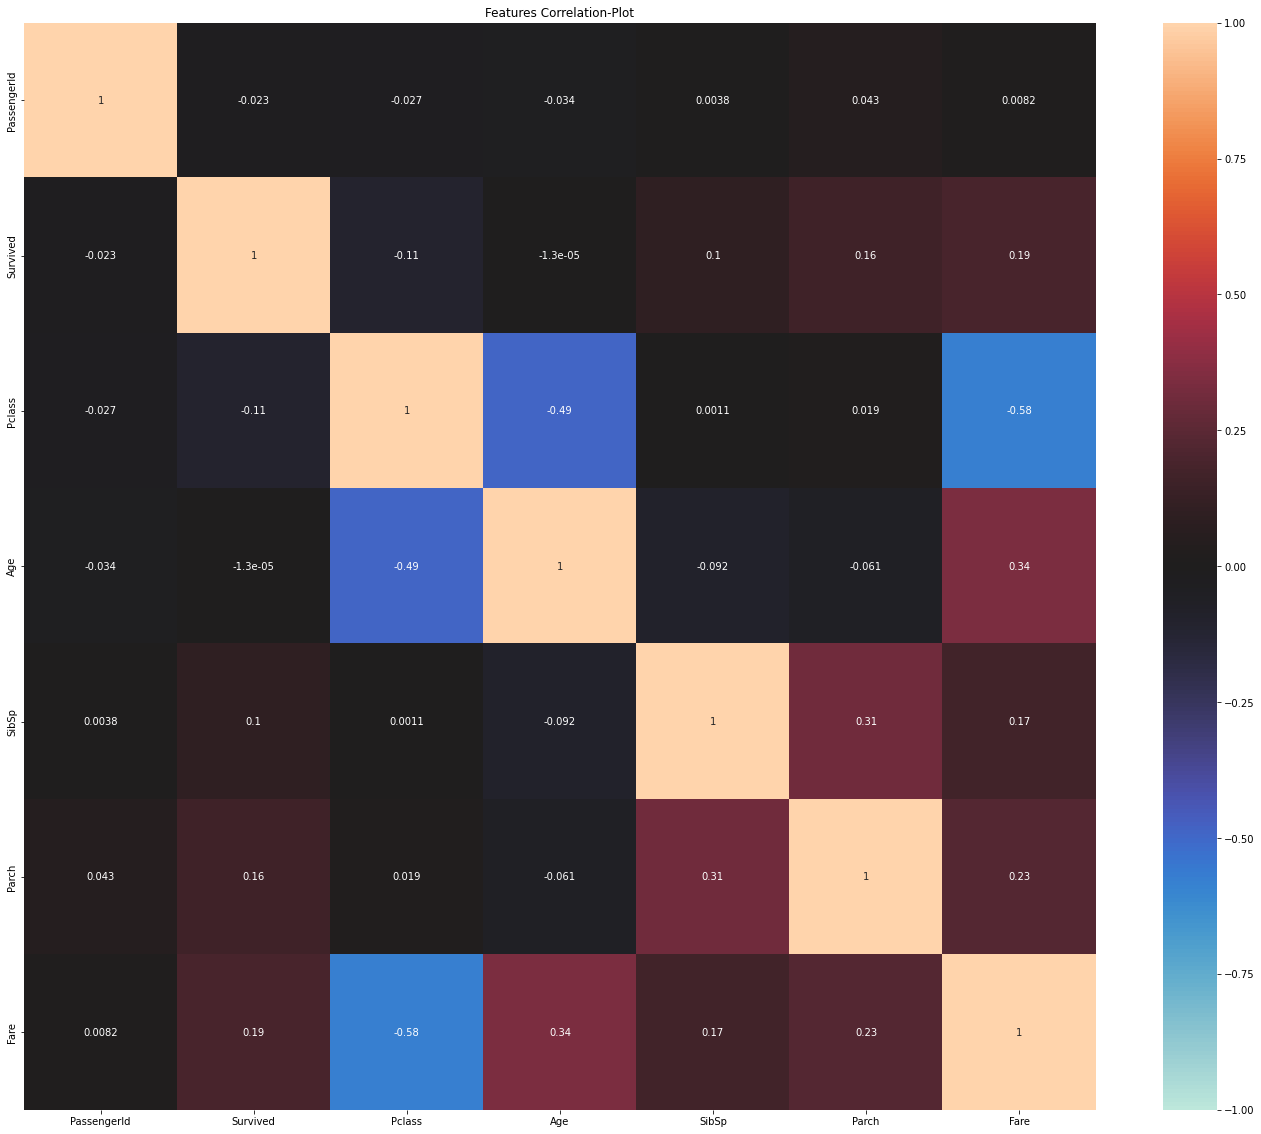

In [ ]:
features = test.columns
plt.figure(figsize=[24,20])
plt.title('Features Correlation-Plot')
sns.heatmap(test[features].corr(), vmin=-1, vmax=1, center=0, annot=True) #, 
plt.show()



---


**Age - Missing Values**





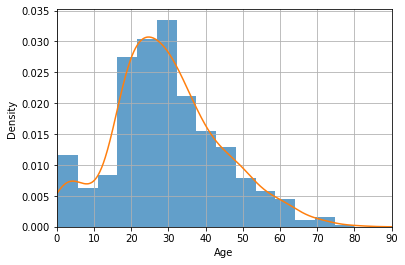

In [ ]:
ax = train['Age'].hist(bins=15, density=True, stacked=True, alpha=0.7)

train['Age'].plot(kind='density')

ax.set(xlabel='Age')
plt.xlim(0, 90)
plt.grid()
plt.show()

In [ ]:
train['Age'].mean(skipna=True)

29.69911764705882

In [ ]:
test['Age'].mean(skipna=True)

30.272590361445783

In [ ]:
train['Age'].median(skipna=True)

28.0

In [ ]:
test['Age'].median(skipna=True)

27.0



---


**Which Port Do the Passengers Board from**

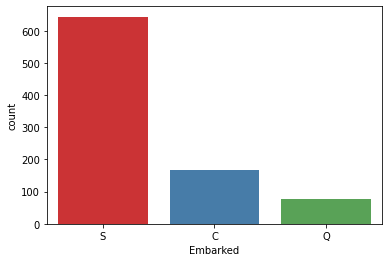

In [ ]:
sns.countplot(x='Embarked', data=train, palette='Set1')
plt.show()

In [ ]:
print('Most boarded port: ', train['Embarked'].value_counts().idxmax())

Most boarded port:  S


In [ ]:
train_data = train.copy()
test_data = test.copy()



---


**Final Decision and Implementation**

>> Age -> We will fill in the missing values with the median method

>> Embarked -> We will fill in the missing values as 'S'

>> Cabin -> We will drop this column because there are too many missing values 

In [ ]:
train_data["Age"].fillna(train["Age"].median(skipna=True), inplace=True)
test_data["Age"].fillna(test["Age"].median(skipna=True), inplace=True)

In [ ]:
train_data["Embarked"].fillna(train['Embarked'].value_counts().idxmax(), inplace=True)
test_data["Embarked"].fillna(test['Embarked'].value_counts().idxmax(), inplace=True)

In [ ]:
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [ ]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
test_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [ ]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)

In [ ]:
test_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [ ]:
test_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S




---


**Unnecessary Variable Analysis**

>> SibSp: # of siblings / spouses aboard the Titanic
>> Parch: # of parents / children aboard the Titanic

>> As you can see, both variables are very related and highly correlated. It would be healthier to collect these two variables under one variable: SoloTravel

>> Let's name our variable SoloTravel. And this will be a categorical variable. 0 or 1.

In [ ]:
train_data['SoloTravel'] = np.where((train_data["SibSp"] + train_data["Parch"]) > 0, 0, 1)
test_data['SoloTravel'] = np.where((test_data["SibSp"] + test_data["Parch"]) > 0, 0, 1)

In [ ]:
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,SoloTravel
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1




---


**Categorical Variables**

"Pclass","Embarked","Sex" columns are categorical -> we need to encode them

In [ ]:
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,SoloTravel
0,892,0,3,"Kelly, Mr. James",male,34.5,330911,7.8292,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,S,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,S,0


In [ ]:
train_data = pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"], drop_first=True)
test_data = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"], drop_first=True)

In [ ]:
train_data.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,SoloTravel,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,1,0,1,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,1,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,0,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,1,0,1,1


In [ ]:
test_data.head()

,PassengerId,Survived,Name,Age,Ticket,Fare,SoloTravel,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,892,0,"Kelly, Mr. James",34.5,330911,7.8292,1,0,1,1,0,1
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",47.0,363272,7.0000,0,0,1,0,1,0
2,894,0,"Myles, Mr. Thomas Francis",62.0,240276,9.6875,1,1,0,1,0,1
3,895,0,"Wirz, Mr. Albert",27.0,315154,8.6625,1,0,1,0,1,1
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,3101298,12.2875,0,0,1,0,1,0


In [ ]:
train_data.drop('PassengerId', axis=1, inplace=True)
train_data.drop('Name', axis=1, inplace=True)
train_data.drop('Ticket', axis=1, inplace=True)
test_data.drop('PassengerId', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)
test_data.drop('Ticket', axis=1, inplace=True)

In [ ]:
train_data.head()

,Survived,Age,Fare,SoloTravel,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,1,0,1,1
1,1,38.0,71.2833,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,1,0,1,0
3,1,35.0,53.1000,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,1,0,1,1


In [ ]:
test_data.head()

,Survived,Age,Fare,SoloTravel,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,34.5,7.8292,1,0,1,1,0,1
1,1,47.0,7.0000,0,0,1,0,1,0
2,0,62.0,9.6875,1,1,0,1,0,1
3,0,27.0,8.6625,1,0,1,0,1,1
4,1,22.0,12.2875,0,0,1,0,1,0


**Exploratory Data Analysis**

In [ ]:
train_data.shape

(891, 9)

In [ ]:
test_data.shape

(418, 9)

In [ ]:
col_names = train_data.columns

col_names

Index(['Survived', 'Age', 'Fare', 'SoloTravel', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')



---


**EDA for Age Variable**

>> The age distributions of survivors and those who died are quite similar.

>> We can say that among the survivors, the proportion of children and young people is higher.

>> This may be because parents are giving their children life jackets and boats to save theirs, instead of saving their own.

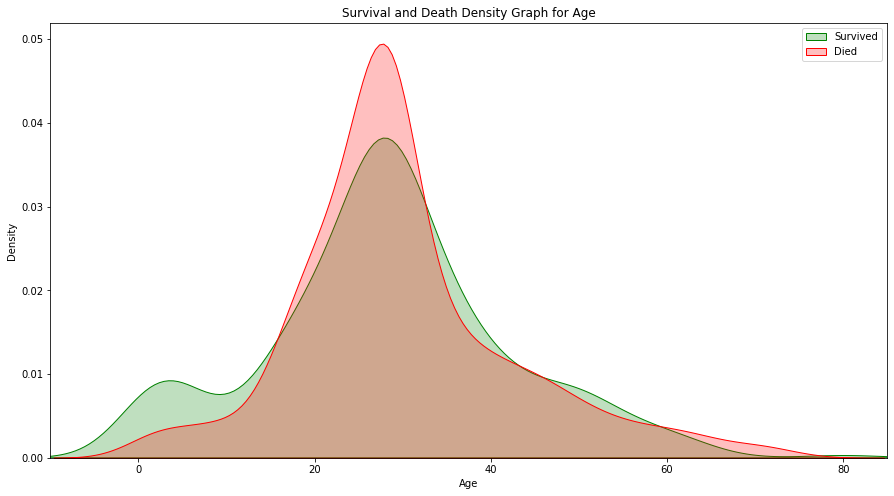

In [ ]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(train_data["Age"][train_data.Survived == 1], color="green", shade=True)

sns.kdeplot(train_data["Age"][train_data.Survived == 0], color="red", shade=True)

plt.legend(['Survived', 'Died'])
plt.title('Survival and Death Density Graph for Age')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()



---


**EDA for Fare Variable**

>> When we look at the fare, we see that the survival and death rates are clearly separated from each other.

>> Pay is likely to be an important factor in our model.

>> Low fare passengers have a much higher death rate.

>> Those who pay higher fares have a higher survival rate

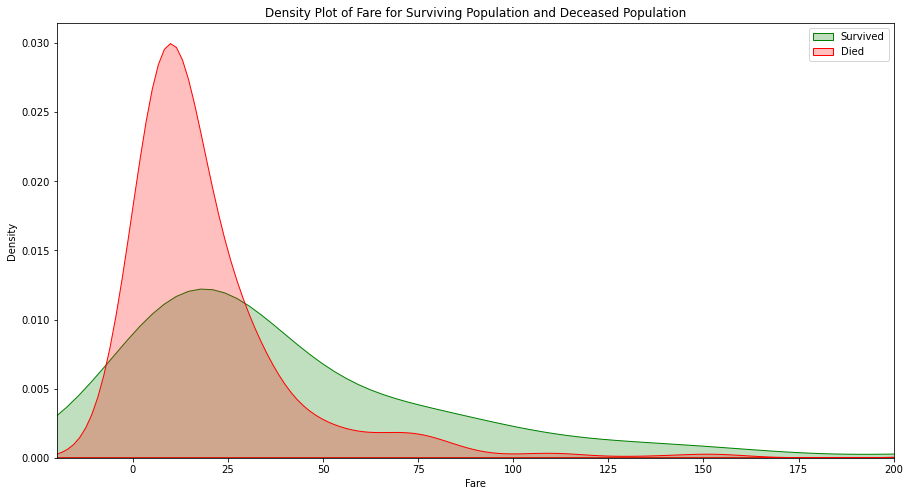

In [ ]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(train_data["Fare"][train_data.Survived == 1], color="green", shade=True)

sns.kdeplot(train_data["Fare"][train_data.Survived == 0], color="red", shade=True)

plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()



---


**EDA for Passenger Variable**

>>1.class passengers have higher survival rates.

>> Therefore, this confirms the assumption we made for Fare.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


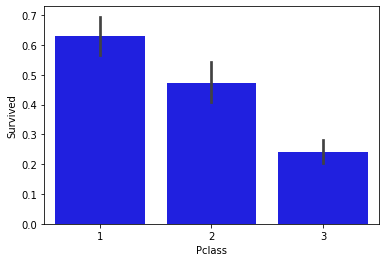

In [ ]:
sns.barplot('Pclass', 'Survived', data=train, color="blue")

plt.show()




---


**EDA for Sex Variable**

>> When we look at sex, we see a big difference between the survival rates of men and women.

>> Survival rates for women are much higher.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


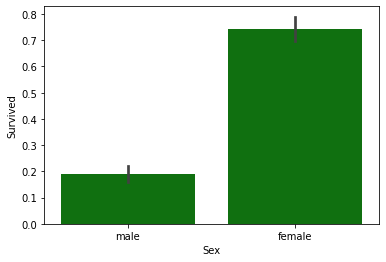

In [ ]:
sns.barplot('Sex', 'Survived', data=train, color="green")

plt.show()



---


**EDA for Family or Solo Travel**

>> Those traveling with family (SoloTravel = 0) have higher survival rates.

>> This supports our assumption that most of them are children or teenagers and that they survive relatively longer.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


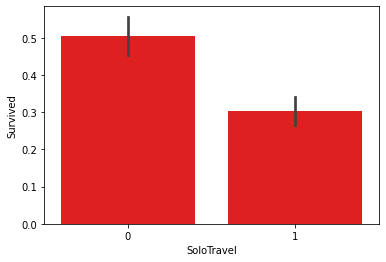

In [ ]:
sns.barplot('SoloTravel', 'Survived', data=train_data, color="red")

plt.show()



---


**Feature Scaling**

In [ ]:
train_data.describe()

,Survived,Age,Fare,SoloTravel,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.361582,32.204208,0.602694,0.206510,0.551066,0.086420,0.725028,0.647587
std,0.486592,13.019697,49.693429,0.489615,0.405028,0.497665,0.281141,0.446751,0.477990
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,28.000000,14.454200,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,35.000000,31.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cols = train_data.columns

cols

Index(['Survived', 'Age', 'Fare', 'SoloTravel', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')



---


**Model and Prediction**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)

In [ ]:
train_data = pd.DataFrame(train_data, columns=[cols])
test_data = pd.DataFrame(test_data, columns=[cols])

In [ ]:
train_data.head()

,Survived,Age,Fare,SoloTravel,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0.0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,1.0
1,1.0,0.472229,0.139136,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.321438,0.015469,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.434531,0.103644,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.434531,0.015713,1.0,0.0,1.0,0.0,1.0,1.0


In [ ]:
test_data.head()

,Survived,Age,Fare,SoloTravel,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0.0,0.452723,0.015282,1.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.617566,0.013663,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.815377,0.018909,1.0,1.0,0.0,1.0,0.0,1.0
3,0.0,0.353818,0.016908,1.0,0.0,1.0,0.0,1.0,1.0
4,1.0,0.287881,0.023984,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
y = train["Survived"]
X = train_data
X_test = test_data
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,



---


**Submit**

In [ ]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submit.csv', index=False)



---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import random

random.seed(6278)
sns.set_style('whitegrid') # Set style

# Import dataset into two DataFrames
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

test_key = test['PassengerId']
SEED = 6278



---


**Clean Data**

Visualize Missing Data

In [ ]:
# Count NA in train data
train_na = (train.isna().sum()/len(train)).sort_values(ascending=False).to_frame(name='Train NA')
# Count NA in test data
test_na = (test.isna().sum()/len(train)).to_frame(name='Test NA')
pd.concat([train_na, test_na], axis=1).T

,Cabin,Age,Embarked,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
Train NA,0.771044,0.198653,0.002245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Test NA,0.367003,0.096521,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001122




---


**Analyze Title**

>> The actual name holds little informational value, but the associated title contains more.

>> Using regex, pull out the title from the Name column and visualize the different counts of title.

>> As there are many one-off obscure title's, analyze and map them to a simpler title scheme for use by the models.

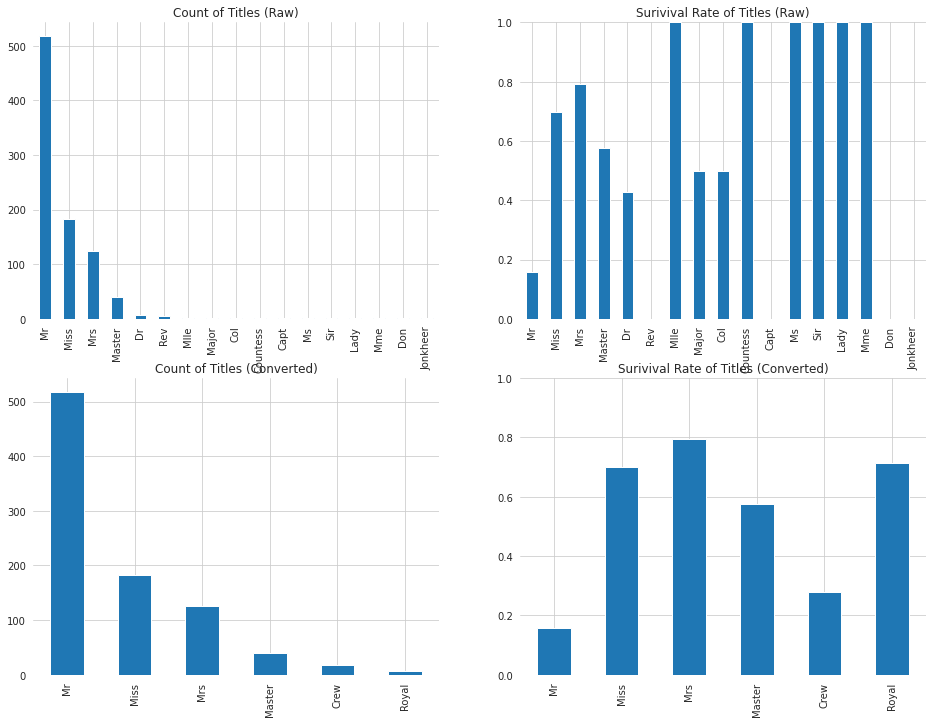

In [ ]:
# Extract the title from the Name column
train['Title'] = train['Name'].apply(lambda name: re.findall(',[a-z ]* ([A-Z][a-z]+). |$', name)[0])
test['Title'] = test['Name'].apply(lambda name: re.findall(', ([A-Z][a-z]+). |$', name)[0])

# Create figure for plotting the titles
fig, axs = plt.subplots(2, 2, figsize=[16,12])

# Plot the number of raw titles first extract in a bar plot
train['Title'].value_counts().plot.bar(title='Count of Titles (Raw)', ax=axs[0,0]);
title_order = list(train['Title'].value_counts().index)

train.groupby('Title').mean()['Survived'].reindex(index=title_order).plot.bar(title='Surivival Rate of Titles (Raw)', ax=axs[0,1])
title_map = {'Mr':'Mr',
             'Miss':'Miss', 'Ms':'Miss',
             'Mrs':'Mrs', 'Mme':'Mrs',
             'Master':'Master',
             'Dr':'Crew', 'Rev':'Crew', 'Col':'Crew', 'Capt':'Crew', 'Major':'Crew', 
             'Mlle':'Royal', 'Countess':'Royal', 'Sir':'Royal', 'Lady':'Royal', 'Don':'Royal', 'Jonkheer':'Royal', 'Dona':'Royal'}

train['Title Conv'] = train['Title'].map(title_map)
test['Title Conv'] = test['Title'].map(title_map)

train['Title Conv'].value_counts().plot.bar(title='Count of Titles (Converted)', ax=axs[1,0]);
title_order_conv = list(train['Title Conv'].value_counts().index)

train.groupby('Title Conv').mean()['Survived'].reindex(index=title_order_conv).plot.bar(title='Surivival Rate of Titles (Converted)', ax=axs[1,1])

axs[0,1].set_ylim([0,1])
axs[0,1].set_xlabel('')
axs[1,1].set_ylim([0,1])
axs[1,1].set_xlabel('')
train = train.drop(['Name','Title'], axis=1)
test = test.drop(['Name','Title'], axis=1)

sns.despine(left=True, bottom=True)



---


**Preprocessing and Visualize Data**

>>**Visualizing Age**

>>> Using a violin plots and histogram to understand the impact of age on survival rate. It seems that the shape distribution is quite different for the two and also that the data does not have a normal distribution.

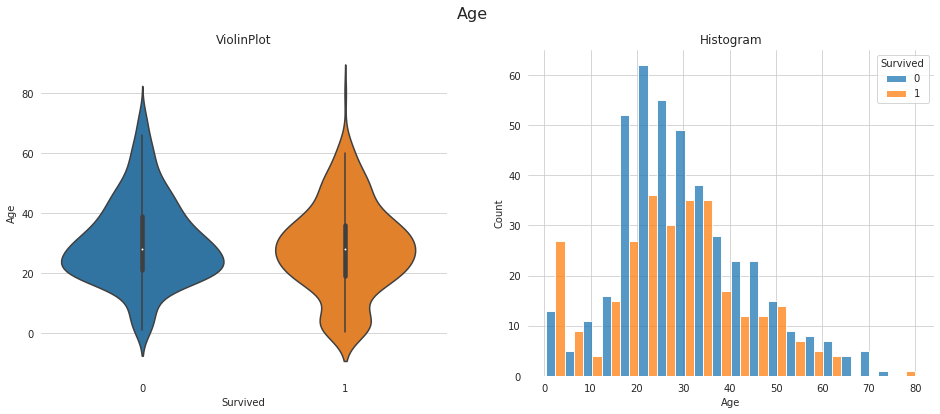

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[16,6])
fig.suptitle('Age', fontsize=16)

sns.violinplot(data=train, y='Age', x='Survived', ax=ax1) 
sns.histplot(data=train, x='Age', hue="Survived", ax=ax2, multiple="dodge")
sns.despine(left=True, bottom=True)
ax1.set_title('ViolinPlot')
ax2.set_title('Histogram');

ss_age = StandardScaler()
train['Age'] = ss_age.fit_transform(train[['Age']])
test['Age'] = ss_age.transform(test[['Age']])



---


**Visualizing Sex, Embarked, Pclass**

>> Calculating the rate of survival for each categorical value in the listed features gives a quick view on if they can be used to help determine Survival of the passenger. It is very clear that all three features have some statistical signficance in the difference between survival rates of their values.

>>Since each feature has at most 3 distinct values, it will be possible to One-Encode each for training.

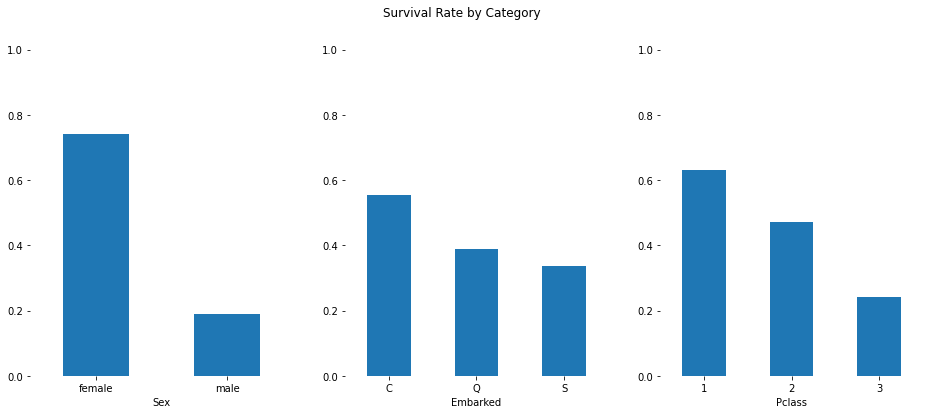

In [ ]:
cat_cols = ['Sex','Embarked','Pclass'] # Examine the following three features
fig, axs = plt.subplots(1,3, figsize=[16,6])
fig.suptitle('Survival Rate by Category')

for ax, col in zip(axs, cat_cols): # Loop through a feature and assign it an axis
    train.groupby(col).mean()['Survived'].plot.bar(ax=ax) # Since survived is 1/0 binary, the mean will be the percentage that suvrives
    sns.despine(left=True, bottom=True)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)
    ax.set_ylim([0,1])

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode())
test['Embarked'] = test['Embarked'].fillna(train['Embarked'].mode())

train['Sex'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 0)
test['Sex'] = test['Sex'].apply(lambda x: 1 if x == 'male' else 0)
train = pd.get_dummies(train, columns=['Embarked','Pclass'])
test = pd.get_dummies(test, columns=['Embarked','Pclass'])



---



In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [ ]:
precent_null_train = train.isnull().sum().sum()/np.product(train.shape)*100
precent_null_test = test.isnull().sum().sum()/np.product(test.shape)*100

print('Percetnage of null values in train data: ',precent_null_train)
print('Percetnage of null values in test data: ',precent_null_test)
print(" ")
precent_null_train_cabin= train['Cabin'].isnull().sum()/train.shape[0]*100
precent_null_test_cabin= test['Cabin'].isnull().sum()/test.shape[0]*100
print('Percetnage of null values in column Cabin in train data: ',precent_null_train_cabin)
print('Percetnage of null values in column Cabin in test data: ',precent_null_test_cabin)

Percetnage of null values in train data:  8.099513655069211
Percetnage of null values in test data:  8.253588516746412
 
Percetnage of null values in column Cabin in train data:  77.10437710437711
Percetnage of null values in column Cabin in test data:  78.22966507177034




---



In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
ti = pd.read_csv("test.csv")
ti.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
ti.fillna(ti.mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
ti.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64



---



In [ ]:
#split dataset in features and target variable
feature_cols = ['PassengerId', 'Pclass', 'Age','SibSp',	'Parch',	'Fare'] 
X = ti[feature_cols].values # Features
y = ti.Survived # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
kNN.fit(X_train, y_train)

#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
rbf = SVC(kernel = 'rbf', random_state = 0)
rbf.fit(X_train, y_train)

#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train, y_train)

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[59, 11],
       [25, 10]])

In [ ]:
#test the three models with the test data and print their accuracy scores

#print('classifier: {}'.format(sc.score(X_test, y_test)))
print('lr: {}'.format(lr.score(X_test, y_test)))
print('kNN: {}'.format(kNN.score(X_test, y_test)))
print('rdf: {}'.format(rbf.score(X_test, y_test)))
print('gnbr: {}'.format(gnb.score(X_test, y_test)))
print('dtc: {}'.format(dtc.score(X_test, y_test)))
print('rfc: {}'.format(rfc.score(X_test, y_test)))

lr: 0.6571428571428571
kNN: 0.6761904761904762
rdf: 0.6857142857142857
gnbr: 0.7047619047619048
dtc: 0.638095238095238
rfc: 0.6571428571428571


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6571428571428571
Precision: 0.47619047619047616
Recall: 0.2857142857142857


In [ ]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submit.csv', index=False)



---



**Conclusion:**

>> We explored the data, cleaned up the data, then we modified features and created new ones and in a last step we made a prediction with a random forest tree classifier, Gaussian NB, Decision tree Classifier, Logistic Regression, SVC and KNeighbors classifer.

---

